In [256]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, OPTICS
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [285]:
X = np.array(
    [[1180.362060546875, 301.0], [1176.257080078125, 320.97003173828125], [1179.036865234375, 341.7375183105469],
     [1172.4515380859375, 361.1407165527344], [1174.8936767578125, 383.5798034667969],
     [1180.506591796875, 409.4164123535156], [1172.6824951171875, 430.7200622558594],
     [1139.1788330078125, 434.86505126953125], [1110.3919677734375, 437.262451171875],
     [1078.9588623046875, 431.95892333984375], [1077.31103515625, 455.11468505859375],
     [1073.011474609375, 479.5441589355469], [1073.0928955078125, 517.6676635742188],
     [1064.2974853515625, 550.407958984375], [1039.1278076171875, 551.357666015625],
     [1015.193115234375, 551.7933349609375], [993.4500732421875, 558.7635498046875],
     [969.888916015625, 551.1821899414062], [948.0, 550.5140991210938], [925.9698486328125, 552.7964477539062],
     [903.6271362304688, 552.6546630859375], [882.0984497070312, 546.9727783203125],
     [856.0120239257812, 553.7207641601562], [830.454833984375, 553.083740234375],
     [800.7747802734375, 556.0023193359375], [771.2079467773438, 553.498291015625],
     [735.956787109375, 553.716064453125], [695.3164672851562, 553.6834716796875],
     [650.1781616210938, 550.9012451171875], [600.3699340820312, 544.4136352539062],
     [605.8870849609375, 498.5184020996094], [605.0963134765625, 460.8938903808594],
     [598.54833984375, 428.185791015625], [603.671142578125, 393.2612609863281], [600.047607421875, 362.3526306152344],
     [601.5751342773438, 331.3084411621094], [601.1082153320312, 301.0], [601.6827392578125, 270.7009582519531],
     [599.7786254882812, 239.59994506835938], [602.069091796875, 208.30947875976562],
     [601.850341796875, 175.01600646972656], [871.028564453125, 265.1086730957031],
     [888.1329956054688, 266.43585205078125], [895.89208984375, 264.5136413574219],
     [907.2339477539062, 266.7933044433594], [907.64111328125, 260.64111328125],
     [906.4351196289062, 251.46238708496094], [904.9683227539062, 239.54103088378906],
     [838.2903442382812, 110.97676849365234], [858.6094360351562, 109.29570007324219],
     [878.44873046875, 109.92027282714844], [898.4163818359375, 115.93281555175781],
     [915.254150390625, 115.28712463378906], [931.4279174804688, 111.58740997314453], [948.0, 110.51300048828125],
     [964.5943603515625, 111.33369445800781], [980.9259643554688, 114.26581573486328],
     [999.5745849609375, 108.50165557861328], [1015.17431640625, 116.450439453125],
     [1029.460205078125, 126.30294036865234], [1042.8221435546875, 136.7627410888672],
     [1056.896240234375, 145.47195434570312], [1068.2320556640625, 157.70556640625],
     [1084.1162109375, 164.88388061523438], [1099.440185546875, 173.92709350585938],
     [1111.01025390625, 186.8588104248047], [1125.35498046875, 198.6043701171875],
     [1147.817626953125, 207.82623291015625], [1161.4329833984375, 223.31932067871094],
     [1177.1170654296875, 239.6091766357422], [1177.5777587890625, 260.5197448730469],
     [1176.0731201171875, 281.0460205078125]]
)

In [272]:
X = np.array(
    [[697.0882568359375, 245.0], [694.3992309570312, 255.97109985351562], [691.781982421875, 266.6495056152344],
     [689.1947021484375, 277.2055969238281], [686.597412109375, 287.8024597167969],
     [683.9503784179688, 298.60260009765625], [681.209716796875, 309.7841491699219],
     [678.3257446289062, 321.5508728027344], [675.2390747070312, 334.144775390625],
     [671.8735961914062, 347.87579345703125], [668.1314086914062, 363.1438903808594],
     [663.8763427734375, 380.5044860839844], [658.9165649414062, 400.74041748046875],
     [646.5137329101562, 411.23358154296875], [629.6761474609375, 411.6969909667969],
     [613.7783203125, 412.1345520019531], [598.5438842773438, 412.5538330078125],
     [583.6951904296875, 412.9625244140625], [569.0, 413.3669738769531], [554.2339477539062, 413.7734069824219],
     [540.3035278320312, 407.74786376953125], [529.188232421875, 393.5970458984375],
     [519.4326782226562, 381.1773681640625], [510.6907958984375, 370.04815673828125],
     [502.6867370605469, 359.85821533203125], [495.22808837890625, 350.3626708984375],
     [488.1518859863281, 341.35400390625], [481.3312072753906, 332.6706848144531],
     [474.6518249511719, 324.1672058105469], [468.0112609863281, 315.713134765625],
     [461.30615234375, 307.1768798828125], [454.43133544921875, 298.42462158203125],
     [447.2693786621094, 289.3068542480469], [439.6838073730469, 279.6496276855469],
     [431.50946044921875, 269.24298095703125], [422.53240966796875, 257.8143310546875], [412.4668884277344, 245.0],
     [400.9158020019531, 230.29444885253906], [387.3013916015625, 212.9620361328125],
     [370.7393798828125, 191.8770294189453], [349.7972717285156, 165.21580505371094],
     [321.9924621582031, 129.81768798828125], [328.224609375, 105.98863983154297],
     [367.109619140625, 103.63461303710938], [398.2779846191406, 101.74774169921875],
     [424.1826477050781, 100.17951965332031], [446.35858154296875, 98.8370361328125],
     [465.8353271484375, 97.657958984375], [483.32110595703125, 96.59940338134766],
     [499.3492126464844, 95.62908172607422], [514.3009033203125, 94.72393798828125],
     [528.5079345703125, 93.8638687133789], [555.6143798828125, 169.08546447753906],
     [562.369140625, 169.21054077148438], [569.0, 169.3333282470703], [575.6094360351562, 169.45571899414062],
     [582.2984619140625, 169.57960510253906], [589.1723022460938, 169.70689392089844],
     [596.3575439453125, 169.8399658203125], [603.9808349609375, 169.9811248779297],
     [660.885009765625, 85.85001373291016], [681.2974853515625, 84.61428833007812],
     [704.7676391601562, 83.19343566894531], [732.4807739257812, 81.51573944091797],
     [730.2513427734375, 109.69452667236328], [723.6249389648438, 136.73020935058594],
     [718.201171875, 158.8588409423828], [713.6167602539062, 177.56361389160156],
     [709.6340942382812, 193.81280517578125], [706.0914306640625, 208.26699829101562],
     [702.873779296875, 221.3947296142578], [699.8950805664062, 233.54808044433594]]

)

In [273]:
# X = np.array([[868.6295776367188, 250.0], [866.0478515625, 253.19496154785156], [863.5013427734375, 256.3462219238281], [860.9890747070312, 259.4553527832031], [858.5137329101562, 262.5186462402344], [856.0658569335938, 265.54803466796875], [853.6522827148438, 268.5347595214844], [851.268310546875, 271.4850769042969], [848.9122924804688, 274.4007873535156], [846.5874633789062, 277.2775573730469], [844.2886962890625, 280.1224670410156], [842.0194091796875, 282.9310607910156], [839.7735595703125, 285.7102355957031], [837.5514526367188, 288.46014404296875], [835.3558959960938, 291.17706298828125], [833.1852416992188, 293.8634033203125], [831.0347290039062, 296.52484130859375], [828.9080200195312, 299.15655517578125], [826.8046264648438, 301.7596740722656], [824.7188720703125, 304.3408508300781], [822.6570434570312, 306.8924255371094], [820.6123657226562, 309.422607421875], [818.588134765625, 311.9278869628906], [816.5817260742188, 314.4107360839844], [814.59423828125, 316.87042236328125], [812.6231689453125, 319.3094787597656], [810.6729125976562, 321.72296142578125], [808.736328125, 324.1197509765625], [806.8141479492188, 326.4985046386719], [804.9091186523438, 328.85595703125], [803.01904296875, 331.19500732421875], [801.1432495117188, 333.516357421875], [799.284423828125, 335.8165588378906], [797.4371337890625, 338.1026916503906], [795.6007690429688, 340.3753967285156], [793.7794189453125, 342.62921142578125], [791.9699096679688, 344.86865234375], [790.1744995117188, 347.090576171875], [788.3905639648438, 349.29803466796875], [786.614990234375, 351.49554443359375], [784.8509521484375, 353.678466796875], [783.0999145507812, 355.8454284667969], [781.357666015625, 358.0015563964844], [779.6243286132812, 360.14654541015625], [777.9016723632812, 362.2784423828125], [776.1864624023438, 364.40106201171875], [774.4815063476562, 366.51104736328125], [772.7857055664062, 368.609619140625], [771.0961303710938, 370.7004699707031], [769.417724609375, 372.7776184082031], [767.7421875, 374.8511047363281], [631.5186767578125, 312.7311096191406], [630.8140869140625, 313.8013916015625], [630.1100463867188, 314.8708801269531], [629.4085693359375, 315.9364318847656], [628.7083129882812, 316.9999694824219], [628.0081787109375, 318.06353759765625], [627.3101196289062, 319.1238098144531], [626.6141357421875, 320.18115234375], [625.9175415039062, 321.23919677734375], [625.2214965820312, 322.2964782714844], [624.52685546875, 323.35150146484375], [623.8325805664062, 324.4062194824219], [623.13916015625, 325.4595642089844], [622.44580078125, 326.5126953125], [621.7531127929688, 327.56494140625], [621.061279296875, 328.6158142089844], [620.3675537109375, 329.6694641113281], [619.6752319335938, 330.72113037109375], [618.9820556640625, 331.7740478515625], [618.2889404296875, 332.82696533203125], [617.5955810546875, 333.88006591796875], [616.9019775390625, 334.93365478515625], [616.2079467773438, 335.9879455566406], [615.5122680664062, 337.044677734375], [614.8167724609375, 338.10113525390625], [614.1203002929688, 339.15899658203125], [613.4227905273438, 340.2185363769531], [612.7239990234375, 341.280029296875], [612.0237426757812, 342.3437194824219], [611.3218383789062, 343.4097900390625], [610.6192016601562, 344.4771423339844], [609.9146118164062, 345.5474853515625], [609.20947265625, 346.6184997558594], [608.50048828125, 347.6954345703125], [607.7916259765625, 348.772216796875], [607.0801391601562, 349.8528747558594], [606.3659057617188, 350.93780517578125], [605.649658203125, 352.0258483886719], [604.9319458007812, 353.11590576171875], [604.210205078125, 354.21240234375], [603.486572265625, 355.31146240234375], [602.7620849609375, 356.4120178222656], [602.0327758789062, 357.5198059082031], [601.3012084960938, 358.6309509277344], [600.56640625, 359.7471923828125], [599.8271484375, 360.8702087402344], [599.0859985351562, 361.9959716796875], [598.3409423828125, 363.1277160644531], [597.5916748046875, 364.26580810546875], [596.8400268554688, 365.40753173828125], [596.0830078125, 366.55755615234375], [595.3231811523438, 367.71173095703125], [594.5582885742188, 368.8735046386719], [593.7882080078125, 370.0432434082031], [593.0147705078125, 371.2181091308594], [592.235595703125, 372.4016418457031], [591.4518432617188, 373.5921325683594], [590.6649780273438, 374.7873229980469], [589.8694458007812, 375.9957580566406], [589.07177734375, 377.20745849609375], [588.2671508789062, 378.42962646484375], [587.4577026367188, 379.6592102050781], [586.6408081054688, 380.9000549316406], [585.8192749023438, 382.1479187011719], [584.989013671875, 383.4090576171875], [584.1536865234375, 384.67791748046875], [583.3123168945312, 385.9560546875], [582.4652709960938, 387.2425842285156], [581.6083374023438, 388.54425048828125], [580.7453002929688, 389.85528564453125], [579.875, 391.17718505859375], [578.995361328125, 392.51336669921875], [578.1106567382812, 393.85723876953125], [577.2151489257812, 395.217529296875], [576.3119506835938, 396.5894470214844], [575.397216796875, 397.97894287109375], [574.4769897460938, 399.3767395019531], [573.54736328125, 400.78875732421875], [572.6051025390625, 402.2200622558594], [571.6534423828125, 403.6657409667969], [570.6949462890625, 405.1216125488281], [569.7225952148438, 406.5986022949219], [568.7396240234375, 408.0916748046875], [567.7449951171875, 409.6025695800781], [566.7421264648438, 411.1258544921875], [565.7235717773438, 412.673095703125], [564.6959838867188, 414.2340087890625], [563.6522216796875, 415.8194274902344], [562.5980224609375, 417.4207763671875], [561.5264892578125, 419.0483093261719], [560.4442749023438, 420.6922912597656], [559.3465576171875, 422.3597106933594], [558.2340698242188, 424.049560546875], [557.1087036132812, 425.7589416503906], [555.9662475585938, 427.4942932128906], [554.8033447265625, 429.2607116699219], [553.6298217773438, 431.0432434082031], [596.5488891601562, 586.7079467773438], [594.1893310546875, 589.6278686523438], [591.7964477539062, 592.5890502929688], [589.3704833984375, 595.5914916992188], [586.9190673828125, 598.6249389648438], [582.8222045898438, 594.9571533203125], [579.6279907226562, 594.9140625], [576.452392578125, 594.8712158203125], [573.297119140625, 594.8287353515625], [570.1491088867188, 594.7862548828125], [567.0067138671875, 594.743896484375], [563.8809814453125, 594.7017211914062], [560.7720336914062, 594.6598510742188], [557.66650390625, 594.6179809570312], [554.5751953125, 594.5762939453125], [551.4867553710938, 594.53466796875], [548.4110107421875, 594.4931640625], [545.3472900390625, 594.4518432617188], [542.2835693359375, 594.4105834960938], [539.2310791015625, 594.369384765625], [536.1884155273438, 594.328369140625], [533.1547241210938, 594.2874755859375], [530.1183471679688, 594.2465209960938], [527.090087890625, 594.2056884765625], [524.06884765625, 594.1649780273438], [521.0428466796875, 594.1241455078125], [518.0332641601562, 594.0836181640625], [515.017822265625, 594.04296875], [512.0172119140625, 594.0025024414062], [509.00933837890625, 593.9619140625], [506.0044250488281, 593.9214477539062], [503.0014953613281, 593.8809204101562], [500.0, 593.8404541015625], [496.99920654296875, 593.7999877929688], [493.9984130859375, 593.7595825195312], [490.9969787597656, 593.7190551757812], [487.9941101074219, 593.6785888671875], [484.9998779296875, 593.63818359375], [481.9921569824219, 593.59765625], [478.9918518066406, 593.55712890625], [475.9765319824219, 593.5164794921875], [472.96734619140625, 593.4760131835938], [469.9526062011719, 593.4352416992188], [466.9312744140625, 593.3945922851562], [463.9140319824219, 593.3538818359375], [460.8892517089844, 593.3130493164062], [457.85614013671875, 593.272216796875], [454.8133850097656, 593.231201171875], [451.7720947265625, 593.190185546875], [448.7203674316406, 593.1490478515625], [445.6574401855469, 593.1077270507812], [442.5931701660156, 593.0664672851562], [439.5162048339844, 593.0249633789062], [436.43743896484375, 592.9833984375], [433.3435363769531, 592.9417114257812], [430.2347106933594, 592.8997802734375], [427.1218566894531, 592.8578491210938], [424.00323486328125, 592.8157348632812], [420.8662414550781, 592.7734985351562], [417.7123107910156, 592.73095703125], [414.56097412109375, 592.6885375976562], [411.391357421875, 592.645751953125], [408.1998291015625, 592.6026611328125], [404.99761962890625, 592.5595092773438], [401.7856140136719, 592.5161743164062], [398.55047607421875, 592.4725952148438], [395.3130798339844, 592.428955078125], [392.0416564941406, 592.384765625], [388.7645568847656, 592.3406982421875], [385.4734802246094, 592.2962646484375], [382.15667724609375, 592.2515258789062], [378.8204040527344, 592.2066040039062], [375.46759033203125, 592.161376953125], [372.0841979980469, 592.1157836914062], [368.69134521484375, 592.0699462890625], [365.2680969238281, 592.0238037109375], [361.8335266113281, 591.9774780273438], [460.84149169921875, 344.5346984863281], [459.63800048828125, 345.0901794433594], [458.4069519042969, 345.6583251953125], [457.15203857421875, 346.23748779296875], [455.8714294433594, 346.8285827636719], [454.5691833496094, 347.4295959472656], [453.2348327636719, 348.0454406738281], [451.8712463378906, 348.6748352050781], [450.4826965332031, 349.315673828125], [449.0636291503906, 349.9706726074219], [447.6070556640625, 350.6429138183594], [446.1215515136719, 351.3284912109375], [444.6000671386719, 352.0307312011719], [443.0468444824219, 352.74755859375], [441.4508361816406, 353.48419189453125], [439.8185729980469, 354.2376403808594], [438.1446533203125, 355.01019287109375], [436.4255676269531, 355.8035888671875], [434.6676330566406, 356.61492919921875], [432.86029052734375, 357.4490661621094], [431.0027160644531, 358.30645751953125], [429.09063720703125, 359.1889343261719], [427.13079833984375, 360.09344482421875], [425.1110534667969, 361.02569580078125], [423.3765869140625, 361.4879150390625], [422.4615173339844, 360.7362365722656], [421.54925537109375, 359.9869079589844], [420.6343688964844, 359.2353820800781], [419.7244567871094, 358.4879455566406], [418.8131103515625, 357.7393493652344], [417.9021301269531, 356.99102783203125], [416.99285888671875, 356.2441101074219], [416.0825500488281, 355.49639892578125], [415.1735534667969, 354.74969482421875], [414.26556396484375, 354.0038757324219], [413.35595703125, 353.2566833496094], [412.447998046875, 352.5108642578125], [411.53802490234375, 351.76336669921875], [410.6282653808594, 351.01605224609375], [409.71844482421875, 350.2687072753906], [408.8059997558594, 349.5191955566406], [407.8941345214844, 348.77020263671875], [406.98162841796875, 348.0206298828125], [406.0670166015625, 347.2693176269531], [405.1535339355469, 346.51898193359375], [404.2364196777344, 345.7656555175781], [403.3166198730469, 345.0101013183594], [402.39727783203125, 344.2549133300781], [401.4748229980469, 343.4971618652344], [400.55010986328125, 342.73760986328125], [399.6241149902344, 341.9769287109375], [398.69659423828125, 341.215087890625], [397.76397705078125, 340.448974609375], [396.83160400390625, 339.68310546875], [182.31288146972656, 521.3287963867188], [189.58554077148438, 510.4677429199219], [196.43942260742188, 500.2318420410156], [202.90304565429688, 490.5789489746094], [209.01004028320312, 481.4587707519531], [214.7903594970703, 472.8262634277344], [220.2708282470703, 464.6416320800781], [225.47535705566406, 456.86907958984375], [230.43211364746094, 449.4665222167969], [235.1465301513672, 442.42584228515625], [239.64320373535156, 435.7105712890625], [243.93760681152344, 429.297119140625], [248.0442352294922, 423.1641540527344], [251.97593688964844, 417.29254150390625], [255.7390899658203, 411.6725769042969], [259.35540771484375, 406.2718505859375], [262.8177795410156, 401.10113525390625], [266.14874267578125, 396.12652587890625], [269.35406494140625, 391.3396911621094], [272.4388732910156, 386.73272705078125], [275.4130859375, 382.29107666015625], [278.2796936035156, 378.0098876953125], [281.04931640625, 373.8737487792969], [283.7232666015625, 369.8804016113281], [286.3027038574219, 366.0281677246094], [288.8011169433594, 362.2970886230469], [291.2228088378906, 358.6803283691406], [293.564453125, 355.1833801269531], [295.8338928222656, 351.7940979003906], [298.0383605957031, 348.50189208984375], [300.1745910644531, 345.3116149902344], [302.24920654296875, 342.2133483886719], [304.26849365234375, 339.1977233886719], [306.22607421875, 336.27423095703125], [308.1339111328125, 333.4250183105469], [309.9883117675781, 330.65557861328125], [311.7947998046875, 327.9577331542969], [313.5560607910156, 325.3274841308594], [315.2709045410156, 322.7664794921875], [316.9441833496094, 320.26751708984375], [318.5758361816406, 317.8309020996094], [320.16693115234375, 315.45465087890625], [321.7226867675781, 313.1312255859375], [323.2431640625, 310.86053466796875], [324.7264099121094, 308.6454162597656], [326.176513671875, 306.47979736328125], [327.5965270996094, 304.3591613769531], [328.9853210449219, 302.2851257324219], [330.34637451171875, 300.25244140625], [331.6773681640625, 298.2646789550781], [332.9796447753906, 296.3199157714844], [334.2576599121094, 294.4112854003906], [335.51031494140625, 292.5404968261719], [336.738525390625, 290.70623779296875], [337.9443664550781, 288.9054260253906], [339.1267395019531, 287.13970947265625], [340.28546142578125, 285.4091796875], [341.4254455566406, 283.7067565917969], [342.5445861816406, 282.035400390625], [343.6445007324219, 280.3927307128906], [344.7252502441406, 278.7787780761719], [345.7881774902344, 277.19134521484375], [346.8321838378906, 275.6322326660156], [347.8608703613281, 274.095947265625], [348.8714294433594, 272.58673095703125], [349.86676025390625, 271.10028076171875], [350.8474426269531, 269.6357421875], [351.8118591308594, 268.1954650878906], [352.7622985839844, 266.77606201171875], [353.69964599609375, 265.3761901855469], [354.622802734375, 263.99749755859375], [355.5319519042969, 262.6397705078125], [356.429443359375, 261.2994689941406], [357.31390380859375, 259.97857666015625], [358.18756103515625, 258.6738586425781], [359.0491027832031, 257.3871765136719], [359.8992004394531, 256.1176452636719], [360.739501953125, 254.8627166748047], [361.5676574707031, 253.62594604492188], [362.3868408203125, 252.4025421142578], [363.196044921875, 251.19406127929688], [363.99560546875, 250.0], [364.7858581542969, 248.81980895996094], [365.567138671875, 247.65296936035156], [366.3398132324219, 246.49905395507812], [367.1029357910156, 245.35948181152344], [367.8592834472656, 244.22991943359375], [368.6066589355469, 243.1137237548828], [369.34661865234375, 242.00868225097656], [370.0794982910156, 240.91415405273438], [370.8042297363281, 239.83187866210938], [371.5224609375, 238.75924682617188], [372.2330017089844, 237.69805908203125], [372.9376525878906, 236.645751953125], [373.6363525390625, 235.602294921875], [374.3280944824219, 234.5692138671875], [375.0134582519531, 233.54568481445312], [375.69384765625, 232.52957153320312], [376.3680419921875, 231.52272033691406], [377.03619384765625, 230.52487182617188], [377.7001037597656, 229.53343200683594], [378.3576354980469, 228.5514373779297], [379.01092529296875, 227.57579040527344], [379.6590576171875, 226.60784912109375], [380.3026123046875, 225.64674377441406], [380.9413757324219, 224.6927947998047], [381.57598876953125, 223.7450408935547], [382.20513916015625, 222.8054962158203], [382.8310852050781, 221.87071228027344], [383.45343017578125, 220.94125366210938], [384.0713806152344, 220.01840209960938], [384.68560791015625, 219.10108947753906], [385.2962951660156, 218.18910217285156], [385.9024963378906, 217.2837677001953], [386.50604248046875, 216.3824005126953], [387.10711669921875, 215.48472595214844], [387.70428466796875, 214.59295654296875], [388.29864501953125, 213.70530700683594], [388.8893737792969, 212.82308959960938], [389.477294921875, 211.945068359375], [390.0635681152344, 211.06951904296875], [390.6469421386719, 210.1982879638672], [391.2270812988281, 209.3319549560547], [391.8052062988281, 208.46852111816406], [392.38140869140625, 207.60806274414062], [392.95501708984375, 206.75144958496094], [393.52703857421875, 205.8970947265625], [394.0966491699219, 205.04644775390625], [394.6640930175781, 204.19903564453125], [395.23040771484375, 203.353271484375], [395.79388427734375, 202.51174926757812], [396.3573303222656, 201.67030334472656], [396.9182434082031, 200.83262634277344], [397.4776306152344, 199.99720764160156], [398.0365295410156, 199.16256713867188], [398.5932922363281, 198.33108520507812], [399.1488952636719, 197.50131225585938], [399.7044677734375, 196.671630859375], [400.2582092285156, 195.84461975097656], [400.8103942871094, 195.02003479003906], [401.36285400390625, 194.19496154785156], [401.914794921875, 193.37063598632812], [402.465576171875, 192.5481414794922], [403.01605224609375, 191.72605895996094], [403.56573486328125, 190.9051513671875], [404.1152038574219, 190.0845184326172], [404.6641845703125, 189.2646484375], [405.2123718261719, 188.44598388671875], [405.761962890625, 187.62527465820312], [406.31036376953125, 186.8062286376953], [406.859375, 185.986328125], [407.4082946777344, 185.16650390625], [407.95733642578125, 184.3466339111328], [408.5064392089844, 183.52655029296875], [409.0559387207031, 182.70599365234375], [409.6065368652344, 181.8836669921875], [410.1569519042969, 181.06167602539062], [410.7080078125, 180.2386932373047], [411.2598876953125, 179.4145050048828], [411.8127136230469, 178.58892822265625], [412.3665771484375, 177.7617645263672], [412.921630859375, 176.93283081054688], [413.4772644042969, 176.10305786132812], [414.03436279296875, 175.27105712890625], [414.59173583984375, 174.4386444091797], [415.15216064453125, 173.6017303466797], [415.7123718261719, 172.76512145996094], [416.2745056152344, 171.925537109375], [416.8388366699219, 171.0828094482422], [417.4046936035156, 170.23773193359375], [417.9715270996094, 169.3911895751953], [418.5415954589844, 168.53982543945312], [419.1129150390625, 167.68658447265625], [419.6849670410156, 166.83230590820312], [420.2607116699219, 165.97251892089844], [420.8380432128906, 165.11024475097656], [421.4179992675781, 164.2441864013672], [422.0013427734375, 163.37298583984375], [422.5860900878906, 162.499755859375], [423.173828125, 161.62200927734375], [423.7647705078125, 160.73947143554688], [424.3575134277344, 159.854248046875], [424.9544372558594, 158.9627685546875], [425.553466796875, 158.0681915283203], [426.1563720703125, 157.16781616210938], [426.76324462890625, 156.26144409179688], [427.3727722167969, 155.3511962890625], [427.9866638183594, 154.43441772460938], [428.60406494140625, 153.5123748779297], [429.2238464355469, 152.58676147460938], [429.850341796875, 151.65113830566406], [430.47845458984375, 150.7130889892578], [431.1119384765625, 149.76708984375], [431.74908447265625, 148.81552124023438], [432.39202880859375, 147.85536193847656], [433.03839111328125, 146.8899688720703], [433.691650390625, 145.91441345214844], [434.3487854003906, 144.9330596923828], [435.01055908203125, 143.94476318359375], [435.6766357421875, 142.9500274658203], [436.3503723144531, 141.9438018798828], [437.0289001464844, 140.93052673339844], [437.712890625, 139.90902709960938], [438.4041748046875, 138.8766632080078], [439.0993347167969, 137.83853149414062], [439.80279541015625, 136.78787231445312], [440.51220703125, 135.7284698486328], [441.3857421875, 134.960205078125], [442.5813903808594, 134.83680725097656], [443.7692565917969, 134.71421813964844], [444.95330810546875, 134.5919952392578], [446.1293640136719, 134.47064208984375], [447.29400634765625, 134.35044860839844], [448.4557800292969, 134.23052978515625], [449.610595703125, 134.1113739013672], [450.759521484375, 133.99278259277344], [451.89837646484375, 133.875244140625], [453.03558349609375, 133.7578887939453], [454.1634216308594, 133.64149475097656], [455.2894287109375, 133.52528381347656], [456.40740966796875, 133.40989685058594], [457.5241394042969, 133.29466247558594], [458.6327209472656, 133.1802520751953], [459.73760986328125, 133.06622314453125], [460.8379821777344, 132.95266723632812], [461.93157958984375, 132.8397979736328], [463.0223693847656, 132.7272186279297], [464.11309814453125, 132.61465454101562], [465.1943054199219, 132.50308227539062], [466.2764892578125, 132.3914031982422], [467.3526916503906, 132.28033447265625], [468.4273681640625, 132.16941833496094], [469.5002136230469, 132.0587158203125], [470.56744384765625, 131.9485626220703], [471.6302185058594, 131.83888244628906], [472.6955261230469, 131.7289276123047], [473.75689697265625, 131.619384765625], [474.813720703125, 131.5103302001953], [475.8702697753906, 131.4012908935547], [476.9271545410156, 131.29222106933594], [477.9805603027344, 131.18348693847656], [479.0306091308594, 131.07513427734375], [480.0816650390625, 130.9666748046875], [481.1299743652344, 130.85848999023438], [482.17950439453125, 130.7501678466797], [483.22686767578125, 130.64205932617188], [484.272216796875, 130.53416442871094], [485.3197937011719, 130.4260711669922], [486.36566162109375, 130.31813049316406], [487.41033935546875, 130.21034240722656], [488.4539489746094, 130.10263061523438], [489.5006408691406, 129.9945831298828], [490.54669189453125, 129.8866424560547], [491.5924987792969, 129.77871704101562], [492.6419982910156, 129.67039489746094], [493.68792724609375, 129.5624542236328], [494.7380065917969, 129.45407104492188], [495.7851257324219, 129.34600830078125], [496.8368835449219, 129.2374725341797], [497.8897705078125, 129.1288299560547], [498.94403076171875, 129.02000427246094], [500.0, 128.91102600097656], [501.057861328125, 128.80186462402344], [502.11785888671875, 128.69247436523438], [503.1802673339844, 128.58282470703125], [504.24542236328125, 128.472900390625], [505.3096008300781, 128.36306762695312], [506.3807067871094, 128.2525177001953], [507.45147705078125, 128.1420135498047], [508.5297546386719, 128.03074645996094], [509.60809326171875, 127.91944885253906], [510.6906433105469, 127.8077163696289], [511.7778625488281, 127.69552612304688], [512.8658447265625, 127.58325958251953], [513.958740234375, 127.4704360961914], [515.0570068359375, 127.35710906982422], [516.1609497070312, 127.24315643310547], [517.266845703125, 127.1290512084961], [518.3787841796875, 127.01429748535156], [519.4971923828125, 126.89888000488281], [520.6185302734375, 126.78317260742188], [521.7467041015625, 126.66670989990234], [522.8780517578125, 126.5499496459961], [524.0173950195312, 126.43236541748047], [525.164794921875, 126.31395721435547], [526.3160400390625, 126.19514465332031], [527.471923828125, 126.07585144042969], [528.6372680664062, 125.95558166503906], [529.8114624023438, 125.83440399169922], [530.9872436523438, 125.71306610107422], [532.1724243164062, 125.59075927734375], [533.3684692382812, 125.46731567382812], [534.5711669921875, 125.34318542480469], [535.7803955078125, 125.21841430664062], [537.0010375976562, 125.0924301147461], [538.2251586914062, 124.96607971191406], [539.465087890625, 124.83809661865234], [540.7100830078125, 124.70963287353516], [541.9633178710938, 124.58030700683594], [543.229248046875, 124.44965362548828], [544.505615234375, 124.31793212890625], [545.7913208007812, 124.18523406982422], [547.0918579101562, 124.05101776123047], [548.3991088867188, 123.91609954833984], [549.721435546875, 123.7796401977539], [551.05126953125, 123.64239501953125], [552.3978271484375, 123.50341033935547], [553.7521362304688, 123.36366271972656], [555.1241455078125, 123.2220687866211], [556.5091552734375, 123.0791244506836], [557.90869140625, 122.93470001220703], [559.3175659179688, 122.78929138183594], [560.7466430664062, 122.64180755615234], [562.1918334960938, 122.49266052246094], [563.6481323242188, 122.34236907958984], [565.1206665039062, 122.19039916992188], [566.6158447265625, 122.03609466552734], [568.123779296875, 121.88046264648438], [569.651123046875, 121.72283935546875], [571.1923828125, 121.56376647949219], [572.7579345703125, 121.40220642089844], [574.3400268554688, 121.23892974853516], [575.9430541992188, 121.07349395751953], [577.5692138671875, 120.90567779541016], [579.2113037109375, 120.73619842529297], [580.878173828125, 120.56417846679688], [582.5690307617188, 120.38967895507812], [584.2864990234375, 120.2124252319336], [586.0230712890625, 120.03321075439453], [587.7880249023438, 119.85105895996094], [589.5755615234375, 119.66658020019531], [591.3917846679688, 119.4791259765625], [593.2325439453125, 119.2891616821289], [595.1094970703125, 119.09546661376953], [597.0076293945312, 118.8995590209961], [598.94091796875, 118.70003509521484], [600.9066162109375, 118.49720001220703], [602.90234375, 118.29120635986328], [604.9351196289062, 118.08145141601562], [607.00048828125, 117.86827087402344], [609.0999755859375, 117.651611328125], [611.2406616210938, 117.43067932128906], [613.4159545898438, 117.20618438720703], [615.6356201171875, 116.97710418701172], [617.8953857421875, 116.74388122558594], [620.1971435546875, 116.50633239746094], [622.5487670898438, 116.26365661621094], [624.9431762695312, 116.01654052734375], [627.3850708007812, 115.76453399658203], [629.8798828125, 115.50704956054688], [632.419921875, 115.24490356445312], [635.0205688476562, 114.97653198242188], [637.680908203125, 114.70198059082031], [640.3936157226562, 114.4220199584961], [643.171142578125, 114.13536834716797], [646.0130004882812, 113.84207916259766], [648.91845703125, 113.5422134399414], [651.8905639648438, 113.23550415039062], [654.9432983398438, 112.92045593261719], [658.0619506835938, 112.59859466552734], [661.2642822265625, 112.26808166503906], [664.5468139648438, 111.92932891845703], [667.9179077148438, 111.58142852783203], [671.37744140625, 111.22439575195312], [674.9296875, 110.85779571533203], [678.5791015625, 110.48116302490234], [682.3309326171875, 110.09396362304688], [686.1903076171875, 109.6956787109375], [690.1683349609375, 109.28512573242188], [694.260009765625, 108.86283874511719], [698.4773559570312, 108.42760467529297], [702.8270874023438, 107.97869110107422], [707.316650390625, 107.51536560058594], [711.9539794921875, 107.03677368164062], [716.7405395507812, 106.54279327392578], [721.69921875, 106.03104400634766], [726.81591796875, 105.50299072265625], [732.119384765625, 104.95565795898438], [737.6173095703125, 104.38825225830078], [743.3172607421875, 103.79999542236328], [749.237060546875, 103.1890640258789], [755.3834228515625, 102.55473327636719], [761.7811279296875, 101.89447021484375], [768.4370727539062, 101.20756530761719], [775.3567504882812, 100.4934310913086], [782.5817260742188, 99.7477798461914], [790.1350708007812, 98.96827697753906], [798.0147705078125, 98.15505981445312], [806.2581176757812, 97.30430603027344], [814.9071044921875, 96.41172790527344], [823.965087890625, 95.47691345214844], [833.4791259765625, 94.49503326416016], [843.5032348632812, 93.46052551269531], [854.03173828125, 92.37394714355469], [865.1593627929688, 91.22555541992188], [876.9022216796875, 90.01364135742188], [889.3360595703125, 88.73043823242188], [902.530517578125, 87.36873626708984], [916.5338134765625, 85.92355346679688], [931.4503173828125, 84.38412475585938], [947.3556518554688, 82.7426528930664], [964.3488159179688, 80.98890686035156], [982.5891723632812, 79.1064682006836], [1002.2041625976562, 77.08214569091797], [1005.2296752929688, 80.95330047607422], [999.877685546875, 87.57666778564453], [994.6608276367188, 94.03248596191406], [989.5819091796875, 100.31786346435547], [984.626220703125, 106.45074462890625], [979.80078125, 112.42227935791016], [975.0994262695312, 118.24022674560547], [970.504638671875, 123.92658233642578], [966.0191040039062, 129.4775848388672], [961.6382446289062, 134.89892578125], [957.35400390625, 140.20086669921875], [953.1689453125, 145.37997436523438], [949.08251953125, 150.43707275390625], [945.0770263671875, 155.39405822753906], [941.1585083007812, 160.24325561523438], [937.32080078125, 164.99258422851562], [933.5628662109375, 169.6430206298828], [929.8793334960938, 174.20162963867188], [926.273193359375, 178.6642608642578], [922.7313842773438, 183.0474090576172], [919.2630615234375, 187.33953857421875], [915.8576049804688, 191.5538787841797], [912.5126953125, 195.69326782226562], [909.2332763671875, 199.75180053710938], [906.0108642578125, 203.73971557617188], [902.841796875, 207.6613311767578], [899.7300415039062, 211.51234436035156], [896.6738891601562, 215.29420471191406], [893.6654663085938, 219.01722717285156], [890.7089233398438, 222.67617797851562], [887.796142578125, 226.2806854248047], [884.9315185546875, 229.82586669921875], [882.1124877929688, 233.31463623046875], [879.3328857421875, 236.75439453125], [876.6005859375, 240.13577270507812], [873.9044189453125, 243.47207641601562], [871.2479858398438, 246.75961303710938]])

In [286]:
X = MinMaxScaler().fit_transform(X)

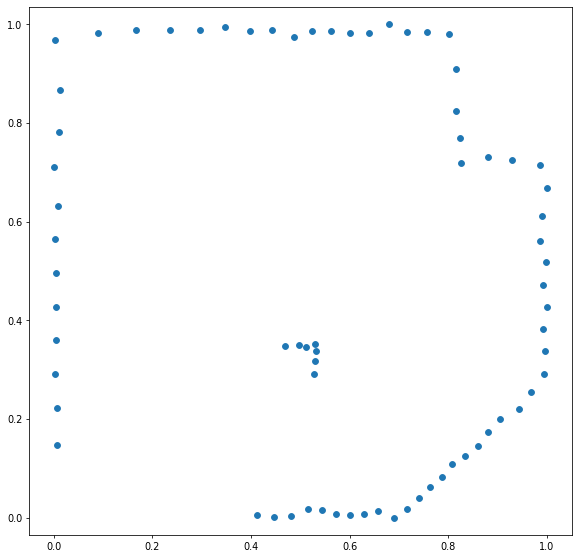

In [287]:
plt.figure(figsize=(10, 10), dpi=70)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal')
plt.show()

In [288]:
lines = []
K = 1
X_ = np.concatenate([X, X], axis=0)
for i in range(len(X)):
    x_1, y_1 = X_[i:i+K].mean(axis=0)
    x_2, y_2 = X_[i+1:i+K+1].mean(axis=0)
    A = y_2 - y_1
    B = x_1 - x_2
    C = - x_1 * A - y_1 * B
    res = np.array([A, B, C])
    lines.append(res/np.linalg.norm(res))
    
lines = np.array(lines)

In [289]:
clasterizer = KMeans(n_clusters=7)
clasterizer.fit(X)
clasterizer.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5], dtype=int32)

In [290]:
final_lines = []
for i in range(clasterizer.labels_.max()):
    final_lines.append(lines[clasterizer.labels_==i].mean(axis=0))

In [291]:
def distance_point_to_line(A, B, C, x, y):
    return np.abs(A*x+B*y+C)/np.sqrt(A**2+B**2)

def distance_point_to_lines_array(lines, x, y):
    return np.array(list(map(lambda l: distance_point_to_line(*l, x, y), lines)))

In [292]:
clusters = np.zeros(len(X), dtype=np.int32)

In [293]:
for i, x in enumerate(X):
    clusters[i] = np.argmin(distance_point_to_lines_array(final_lines, *x))
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5], dtype=int32)

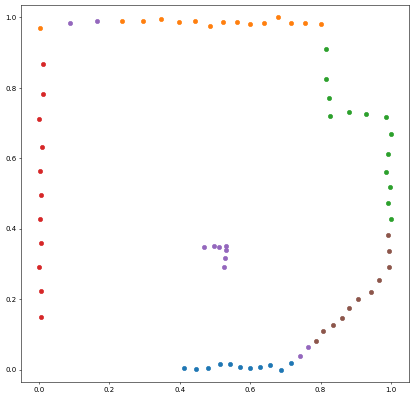

In [294]:
plt.figure(figsize=(10, 10), dpi=50)

for i in range(clusters.max()+1):
    plt.scatter(X[clusters==i, 0], X[clusters==i, 1])

plt.axis('equal')
plt.show()

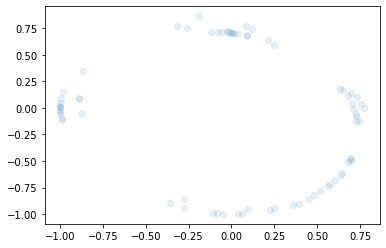

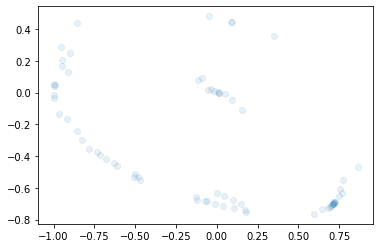

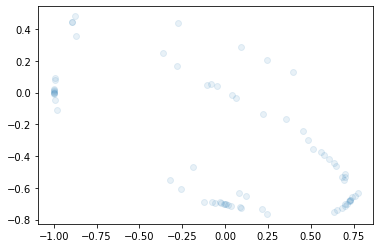

In [296]:
plt.scatter(lines[:, 0], lines[:, 1], alpha=0.1)
plt.show()
plt.scatter(lines[:, 1], lines[:, 2], alpha=0.1)
plt.show()
plt.scatter(lines[:, 0], lines[:, 2], alpha=0.1)
plt.show()